# 제품 이상여부 판별 프로젝트


## 1. 데이터 불러오기


### 필수 라이브러리


In [98]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)

from sklearn.ensemble import RandomForestClassifier
# !pip install lightgbm -q
import lightgbm as lgb

### 데이터 읽어오기


In [99]:
ROOT_DIR = "data"

# data
train = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
test = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))

display(train.head())
display(test.head())

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


,Set ID,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,0001be084fbc4aaa9d921f39e595961b,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3J1XF767-1,1,OK,1000.0,NaN,...,195,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
1,0005bbd180064abd99e63f9ed3e1ac80,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4B1XD472-2,1,OK,1000.0,NaN,...,14,NaN,NaN,256,NaN,NaN,1,NaN,NaN,NaN
2,000948934c4140d883d670adcb609584,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3H1XE355-1,1,OK,240.0,NaN,...,98,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
3,000a6bfd02874c6296dc7b2e9c5678a7,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3L1XA128-1,1,OK,1000.0,NaN,...,14,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN
4,0018e78ce91343678716e2ea27a51c95,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4A1XA639-1,1,OK,240.0,NaN,...,1,NaN,NaN,215,NaN,NaN,1,NaN,NaN,NaN


### 데이터 전처리


In [100]:
def data_preprocessing(
    train: pd.DataFrame,
    test: pd.DataFrame,
    ):
    
    x_train = train.copy()
    x_test = test.copy()
    
    print(f"raw_data -> train: {x_train.shape}, test: {x_test.shape}")
    
    
    # 결측치 처리
    # - 모든 행이 결측치인 행 삭제 처리
    drop_cols = [col
                 for col in train.columns
                 if (train[col].notnull().sum()==0)]
    
    # - "OK"가 유입된 데이터 삭제 처리
    drop_cols.extend([
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam', 
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
        'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave',
        'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave', 
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2',
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'
        ])
    
    # - "Workorder" 컬럼 삭제 처리
    drop_cols.extend([
        'Workorder_Dam',
        'Workorder_AutoClave',
        'Workorder_Fill1',
        'Workorder_Fill2'
    ])
    
    # - 고윳값이 1개인 컬럼 삭제 처리
    drop_cols.extend([col
                      for col in train.columns
                      if train[col].nunique() == 1])
    
    drop_cols = list(set(drop_cols))
    
    x_train = x_train.drop(columns=drop_cols)
    
    # - test 데이터에서 'target' 컬럼 삭제
    drop_cols.extend(['target'])
    x_test = x_test.drop(columns=drop_cols)
    
    print(f"dropped_data -> train: {x_train.shape}, test: {x_test.shape}")    

    
    # 이상치 처리
    # - 이상치 제외 컬럼명
    # exception = ["COORDINATE", "PalletID", "Position", "POSITION", "WorkMode"]
    # exception_cols = [col
    #                   for col in x_train.select_dtypes(exclude='O').columns
    #                   for word in exception
    #                   if word in col]
    # outlier_cols = set(x_train.select_dtypes(exclude='O').columns)\
    #                 - set(exception_cols)
    outlier_cols = x_train.select_dtypes(exclude='O').columns
    # print(outlier_cols, len(outlier_cols))

    for col in outlier_cols:
        Q1 = x_train[col].quantile(0.25)
        Q3 = x_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치를 상한 및 하한으로 대체
        x_train[col] = x_train[col].apply(lambda x: lower_bound if x < lower_bound else x)
        x_train[col] = x_train[col].apply(lambda x: upper_bound if x > upper_bound else x)

    print(f"outlier_cols -> train: {x_train.shape}, test: {x_test.shape}")    
    
    return x_train, x_test

### 인코딩

In [101]:
categorical_cols = []

def feature_encoding(train, test):
    x_train = train.copy()
    x_test = test.copy()

    categorical_df = x_train.select_dtypes(include='O')
    target = categorical_df.pop('target')

    categorical_cols = categorical_df.columns.tolist()

    # - 수치형 컬럼 중 고윳값이 5개 이하면 범주형으로 분류
    #   5개 이하:54개, 7개 이하:66개(workmode 포함) 10개 이하 : 84개 
    categorical_cols.extend([col 
                             for col in x_train.select_dtypes(exclude='O')
                             if x_train[col].nunique() <= 5])


    for col in categorical_cols:
        le = LabelEncoder()
        le.fit_transform(list(x_train[col].values) + list(x_test[col].values))
        
        x_train[col] = le.transform(x_train[col].values)
        x_test[col] = le.transform(x_test[col].values)

    print(f"label_encoding -> train: {x_train.shape}, test: {x_test.shape}")
    print(f"""After label_encoding, categorical cols 
          -> train: {list(x_train.select_dtypes(include='O').columns)}, test: {list(x_test.select_dtypes(include='O').columns)}""")

    return x_train, x_test, categorical_cols

In [102]:
x_tr, x_te = data_preprocessing(train, test)
x_train, x_test, categorical_cols = feature_encoding(x_tr, x_te)

raw_data -> train: (40506, 464), test: (17361, 465)
dropped_data -> train: (40506, 139), test: (17361, 139)
outlier_cols -> train: (40506, 139), test: (17361, 139)
label_encoding -> train: (40506, 139), test: (17361, 139)
After label_encoding, categorical cols 
          -> train: ['target'], test: ['Set ID']


### 스케일링

In [103]:
def describe_data(df, describe_type):
    if describe_type == 'describe' or describe_type == None:
        print(df.describe())
    elif describe_type == 'info':
        print(df.info())

def dataframe_to_csv(df, file_name):
    df.to_csv(file_name, index = False)
    print(f'Data Saved as {file_name}')

In [104]:
def scaling_processing(train, test, scaler):
    train_num_cols = \
        list(set(train.columns) - set(categorical_cols + ["target", "Set ID"]))
    test_num_cols = \
        list(set(train.columns) - set(categorical_cols + ["target", "Set ID"]))

    x_train = train.copy()
    x_test = test.copy()

    for col in train_num_cols:
        x_train[train_num_cols] = scaler.fit_transform(x_train[train_num_cols])
        x_test[test_num_cols] = scaler.transform(x_test[test_num_cols])

    return x_train, x_test

In [105]:
scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = Normalizer()
scaled_x_train, scaled_x_test = scaling_processing(x_train, x_test, scaler)
dataframe_to_csv(scaled_x_train, 'outlier_scaled_train_data_Standard.csv')
dataframe_to_csv(scaled_x_test, 'outlier_scaled_test_data_Standard.csv')

Data Saved as outlier_scaled_train_data_Standard.csv
Data Saved as outlier_scaled_test_data_Standard.csv


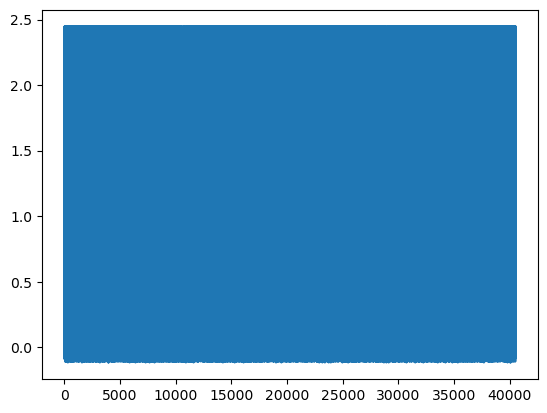

In [97]:
import matplotlib.pyplot as plt

plt.plot(scaled_x_train['Production Qty Collect Result_Dam'])
# scaled_x_train